<a href="https://colab.research.google.com/github/ConeDeveloper/DataScience2-CoderHouse/blob/main/Primer_entrega_Data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
# Carga de datos desde GitHub
url_leads = "https://raw.githubusercontent.com/ConeDeveloper/DataScience2-CoderHouse/main/Leads%20Santa%20Fe.csv"
url_facturacion = "https://raw.githubusercontent.com/ConeDeveloper/DataScience2-CoderHouse/main/Reporte%20Facturaci%C3%B3n.csv"

In [7]:
# Descarga y carga de los archivos
leads_df = pd.read_csv(url_leads)
facturacion_df = pd.read_csv(url_facturacion)


In [8]:
# Diagnóstico de columnas
print("\nColumnas en leads_df:")
print(leads_df.columns.tolist())
print("\nColumnas en facturacion_df:")
print(facturacion_df.columns.tolist())


Columnas en leads_df:
['ID SAP', 'Propietario: Nombre completo', 'Cuenta: Provincia (Estado): Nombre de provincia (estado)', 'Cuenta: Ciudad de facturación', 'Total Avisos Online Simple', 'Total Disponible Avisos Simple', 'Total Avisos Online Destacado', 'Total Disponible Avisos Destacado', 'Total Avisos Online SuperDestacado', 'Total Disponible Avisos SuperDestacado', 'Total Avisos Online Desarrollo Destacado', 'Total Disponible Avisos Desarrollo Desta', 'Total Avisos Online Desarrollo SuperDest', 'Total Disponible Avisos Desarrollo Super', 'Propietario: Nombre', 'Resolución']

Columnas en facturacion_df:
['Periodo', 'Pais', 'Negocio', 'Estado', 'Clasificación', 'Transición Segmentos', 'Alerta Baja', 'ID SAP', 'ID SF', 'Provincia', 'Ciudad', 'Antiguedad (Meses)', 'Owner', 'Importe usd', 'Vs LM', 'Importe ml', 'Vs LM.1', 'Leads', 'Costo x Lead (ml)', 'Costo x Lead (usd)', 'Listings', 'Costo x Listing (ml)', 'Costo x Listing (usd)', 'Flag Integrador']


In [9]:
# Merge de datasets usando ID SAP

merged_df = pd.merge(leads_df, facturacion_df, on='ID SAP', how='left')



In [10]:
#Resumen de metadata
print("\nResumen de Metadata:")
print(f"Número de filas: {merged_df.shape[0]}")
print(f"Número de columnas: {merged_df.shape[1]}")
print("\nTipos de variables:")
print(merged_df.dtypes)
print("\nPrimeras filas del dataset:")
print(merged_df.head())


Resumen de Metadata:
Número de filas: 725
Número de columnas: 39

Tipos de variables:
ID SAP                                                        int64
Propietario: Nombre completo                                 object
Cuenta: Provincia (Estado): Nombre de provincia (estado)     object
Cuenta: Ciudad de facturación                                object
Total Avisos Online Simple                                  float64
Total Disponible Avisos Simple                              float64
Total Avisos Online Destacado                               float64
Total Disponible Avisos Destacado                           float64
Total Avisos Online SuperDestacado                          float64
Total Disponible Avisos SuperDestacado                      float64
Total Avisos Online Desarrollo Destacado                    float64
Total Disponible Avisos Desarrollo Desta                    float64
Total Avisos Online Desarrollo SuperDest                    float64
Total Disponible Avisos Desar

In [38]:
# Análisis Exploratorio de Datos
print("\n### Análisis Exploratorio de Datos")

# Resumen general
rows, cols = merged_df.shape
dtype_counts = merged_df.dtypes.value_counts()
dtype_labels = {np.dtype('int64'): 'Enteros', np.dtype('float64'): 'Flotantes',
                np.dtype('bool'): 'Booleanos', np.dtype('object'): 'Categóricas'}
dtype_names = [dtype_labels.get(dtype, str(dtype)) for dtype in dtype_counts.index]
print(f"Resumen del dataset: {rows} filas y {cols} columnas.")
print("Distribución de tipos de variables:", {name: f"{pct:.1f}%" for name, pct in zip(dtype_names, dtype_counts / dtype_counts.sum() * 100)})

# Estadísticas descriptivas de variables clave
leads_column = next((col for col in merged_df.columns if 'lead' in col.lower()), None)
if leads_column and 'importe_usd' in merged_df.columns and 'costo_x_lead_usd' in merged_df.columns:
    print("\nEstadísticas descriptivas:")
    print(f"  Leads - Promedio: {merged_df[leads_column].mean():.1f}, Mediana: {merged_df[leads_column].median():.1f}, Rango: {merged_df[leads_column].min()} a {merged_df[leads_column].max()}")
    print(f"  Importe_usd - Promedio: ${merged_df['importe_usd'].mean():.2f}, Mediana: ${merged_df['importe_usd'].median():.2f}")
    print(f"  Costo_x_lead_usd - Promedio: ${merged_df['costo_x_lead_usd'].mean():.2f}")

# Distribución geográfica
if 'ciudad' in merged_df.columns:
    top_cities = merged_df.groupby('ciudad')[leads_column].sum().nlargest(3)
    print("\nCiudades con más leads:", top_cities.to_dict())

# Calidad de los datos (porcentaje de nulos)
null_percentages = merged_df[['leads', 'importe_usd', 'costo_x_lead_usd']].isnull().mean() * 100
print("\nPorcentaje de nulos en columnas clave:", {col: f"{pct:.1f}%" for col, pct in null_percentages.items()})

# Correlación inicial
if leads_column and 'importe_usd' in merged_df.columns:
    correlation = merged_df[leads_column].corr(merged_df['importe_usd'])
    print(f"\nCorrelación entre leads e importe_usd: {correlation:.2f}")

# Distribución de clasificacion
if 'clasificacion' in merged_df.columns:
    clasif_dist = merged_df['clasificacion'].value_counts(normalize=True) * 100
    print("\nDistribución de clasificaciones:", {cat: f"{pct:.1f}%" for cat, pct in clasif_dist.items()})


### Análisis Exploratorio de Datos
Resumen del dataset: 725 filas y 41 columnas.
Distribución de tipos de variables: {'Flotantes': '53.7%', 'Categóricas': '41.5%', 'Enteros': '2.4%', 'Booleanos': '2.4%'}

Estadísticas descriptivas:
  Leads - Promedio: 63.7, Mediana: 28.0, Rango: 1.0 a 877.0
  Importe_usd - Promedio: $67.62, Mediana: $59.10
  Costo_x_lead_usd - Promedio: $6.71

Ciudades con más leads: {'Rosario': 38214.915, 'Santa Fe': 4934.0, 'Sin Datos': 799.0}

Porcentaje de nulos en columnas clave: {'leads': '0.0%', 'importe_usd': '0.0%', 'costo_x_lead_usd': '0.0%'}

Correlación entre leads e importe_usd: -0.01


In [13]:
# Normalización del dataset
# Renombrando columnas para que sean más manejables
merged_df.columns = merged_df.columns.str.replace(':', '').str.replace('(', '').str.replace(')', '').str.replace(' ', '_').str.lower()

# Estandarizando nombres de ciudades
if 'cuenta_ciudad_de_facturación' in merged_df.columns:
    merged_df['cuenta_ciudad_de_facturación'] = merged_df['cuenta_ciudad_de_facturación'].str.title()
if 'ciudad' in merged_df.columns:
    merged_df['ciudad'] = merged_df['ciudad'].str.title()

In [14]:
# Identificando columnas numéricas
numeric_cols = ['total_avisos_online_simple', 'total_disponible_avisos_simple',
                'total_avisos_online_destacado', 'total_disponible_avisos_destacado',
                'total_avisos_online_superdestacado', 'total_disponible_avisos_superdestacado',
                'total_avisos_online_desarrollo_destacado', 'total_disponible_avisos_desarrollo_desta',
                'total_avisos_online_desarrollo_superdest', 'total_disponible_avisos_desarrollo_super',
                'importe_usd', 'importe_ml', 'leads', 'costo_x_lead_ml', 'costo_x_lead_usd',
                'listings', 'costo_x_listing_ml', 'costo_x_listing_usd', 'antiguedad_meses']

In [15]:
# Convirtiendo columnas numéricas
for col in numeric_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

In [16]:
# Convirtiendo columnas de porcentaje
if 'vs_lm' in merged_df.columns:
    merged_df['vs_lm'] = merged_df['vs_lm'].str.replace('%', '').str.replace(',', '.').astype(float) / 100
if 'vs_lm.1' in merged_df.columns:
    merged_df['vs_lm.1'] = merged_df['vs_lm.1'].str.replace('%', '').str.replace(',', '.').astype(float) / 100

In [17]:
# Convirtiendo 'flag_integrador' a booleano
if 'flag_integrador' in merged_df.columns:
    merged_df['flag_integrador'] = merged_df['flag_integrador'].map({'Si': True, 'No': False})

In [18]:
# Verificación final
print("\nDatos nulos después de limpieza:")
print(merged_df.isnull().sum())


Datos nulos después de limpieza:
id_sap                                                  0
propietario_nombre_completo                             0
cuenta_provincia_estado_nombre_de_provincia_estado      0
cuenta_ciudad_de_facturación                            8
total_avisos_online_simple                              1
total_disponible_avisos_simple                          1
total_avisos_online_destacado                           1
total_disponible_avisos_destacado                       1
total_avisos_online_superdestacado                      1
total_disponible_avisos_superdestacado                  1
total_avisos_online_desarrollo_destacado                1
total_disponible_avisos_desarrollo_desta                1
total_avisos_online_desarrollo_superdest                1
total_disponible_avisos_desarrollo_super                1
propietario_nombre                                      0
resolución                                              0
periodo                               

In [19]:
# Manejo de datos nulos

# Columnas categóricas: imputar con "Desconocido"
categorical_cols = ['cuenta_ciudad_de_facturación', 'pais', 'negocio', 'estado', 'clasificación',
                   'transición_segmentos', 'alerta_baja', 'provincia', 'ciudad', 'owner', 'id_sf', 'periodo']
for col in categorical_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna('Desconocido')

In [20]:
# Columnas numéricas de avisos: imputar con la mediana
avisos_cols = ['total_avisos_online_simple', 'total_disponible_avisos_simple',
               'total_avisos_online_destacado', 'total_disponible_avisos_destacado',
               'total_avisos_online_superdestacado', 'total_disponible_avisos_superdestacado',
               'total_avisos_online_desarrollo_destacado', 'total_disponible_avisos_desarrollo_desta',
               'total_avisos_online_desarrollo_superdest', 'total_disponible_avisos_desarrollo_super']
for col in avisos_cols:
    if col in merged_df.columns:
        non_zero_median = merged_df[merged_df[col] > 0][col].median()
        merged_df[col] = merged_df[col].fillna(non_zero_median if pd.notna(non_zero_median) else 0)

In [21]:
# Columnas numéricas clave (leads, listings): imputar con la mediana
for col in ['leads', 'listings']:
    if col in merged_df.columns:
        non_zero_median = merged_df[merged_df[col] > 0][col].median()
        merged_df[col] = merged_df[col].fillna(non_zero_median if pd.notna(non_zero_median) else 0)

In [22]:
# Columnas financieras
# Imputar importe_ml con la mediana
if 'importe_ml' in merged_df.columns:
    non_zero_ml_median = merged_df[merged_df['importe_ml'] > 0]['importe_ml'].median()
    merged_df['importe_ml'] = merged_df['importe_ml'].fillna(non_zero_ml_median if pd.notna(non_zero_ml_median) else 1000)

In [23]:
# Calcular importe_usd a partir de importe_ml y luego imputar nulos restantes
if 'importe_ml' in merged_df.columns:
    tipo_cambio = 1200
    merged_df['importe_usd'] = np.where((merged_df['importe_usd'].isna()) | (merged_df['importe_usd'] == 0),
                                        merged_df['importe_ml'] / tipo_cambio,
                                        merged_df['importe_usd'])
    non_zero_usd_median = merged_df[merged_df['importe_usd'] > 0]['importe_usd'].median()
    merged_df['importe_usd'] = merged_df['importe_usd'].fillna(non_zero_usd_median if pd.notna(non_zero_usd_median) else 1.0)

In [24]:
# Calcular costos después de imputar leads y listings
if 'leads' in merged_df.columns:
    merged_df['costo_x_lead_usd'] = np.where(merged_df['leads'] > 0, merged_df['importe_usd'] / merged_df['leads'], np.nan)
    non_zero_cost_median = merged_df[merged_df['costo_x_lead_usd'].notna() & (merged_df['costo_x_lead_usd'] > 0)]['costo_x_lead_usd'].median()
    merged_df['costo_x_lead_usd'] = merged_df['costo_x_lead_usd'].fillna(non_zero_cost_median if pd.notna(non_zero_cost_median) else 0.5)

    merged_df['costo_x_lead_ml'] = np.where(merged_df['leads'] > 0, merged_df['importe_ml'] / merged_df['leads'], np.nan)
    non_zero_cost_ml_median = merged_df[merged_df['costo_x_lead_ml'].notna() & (merged_df['costo_x_lead_ml'] > 0)]['costo_x_lead_ml'].median()
    merged_df['costo_x_lead_ml'] = merged_df['costo_x_lead_ml'].fillna(non_zero_cost_ml_median if pd.notna(non_zero_cost_ml_median) else 0.5)

if 'listings' in merged_df.columns:
    merged_df['costo_x_listing_usd'] = np.where(merged_df['listings'] > 0, merged_df['importe_usd'] / merged_df['listings'], np.nan)
    non_zero_cost_list_median = merged_df[merged_df['costo_x_listing_usd'].notna() & (merged_df['costo_x_listing_usd'] > 0)]['costo_x_listing_usd'].median()
    merged_df['costo_x_listing_usd'] = merged_df['costo_x_listing_usd'].fillna(non_zero_cost_list_median if pd.notna(non_zero_cost_list_median) else 0.5)

    merged_df['costo_x_listing_ml'] = np.where(merged_df['listings'] > 0, merged_df['importe_ml'] / merged_df['listings'], np.nan)
    non_zero_cost_list_ml_median = merged_df[merged_df['costo_x_listing_ml'].notna() & (merged_df['costo_x_listing_ml'] > 0)]['costo_x_listing_ml'].median()
    merged_df['costo_x_listing_ml'] = merged_df['costo_x_listing_ml'].fillna(non_zero_cost_list_ml_median if pd.notna(non_zero_cost_list_ml_median) else 0.5)

In [25]:
# Otras columnas numéricas y booleanas
if 'antiguedad_meses' in merged_df.columns:
    merged_df['antiguedad_meses'] = merged_df['antiguedad_meses'].fillna(0)

for col in ['vs_lm', 'vs_lm.1']:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(0)

if 'flag_integrador' in merged_df.columns:
    merged_df['flag_integrador'] = merged_df['flag_integrador'].fillna(False)

<ipython-input-25-9ecc080e9e5e>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['flag_integrador'] = merged_df['flag_integrador'].fillna(False)


In [26]:
# Verificación final de nulos
print("\nDatos nulos después de imputación:")
print(merged_df.isnull().sum())


Datos nulos después de imputación:
id_sap                                                0
propietario_nombre_completo                           0
cuenta_provincia_estado_nombre_de_provincia_estado    0
cuenta_ciudad_de_facturación                          0
total_avisos_online_simple                            0
total_disponible_avisos_simple                        0
total_avisos_online_destacado                         0
total_disponible_avisos_destacado                     0
total_avisos_online_superdestacado                    0
total_disponible_avisos_superdestacado                0
total_avisos_online_desarrollo_destacado              0
total_disponible_avisos_desarrollo_desta              0
total_avisos_online_desarrollo_superdest              0
total_disponible_avisos_desarrollo_super              0
propietario_nombre                                    0
resolución                                            0
periodo                                               0
pais        

 Análisis Exploratorio de Datos (EDA)

Resumen estadístico de columnas numéricas:
       total_avisos_online_simple  total_disponible_avisos_simple  \
count                  725.000000                      725.000000   
mean                    46.296552                     1984.860690   
std                     91.096052                    21557.836349   
min                      0.000000                       -2.000000   
25%                      0.000000                        0.000000   
50%                     17.000000                       10.000000   
75%                     41.000000                       37.000000   
max                   1118.000000                   299723.000000   

       total_avisos_online_destacado  total_disponible_avisos_destacado  \
count                     725.000000                         725.000000   
mean                        7.452414                           4.593103   
std                        18.974889                          26.481020

<ipython-input-27-42f4d5f05e8e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_leads.index, y=city_leads.values, palette="viridis")


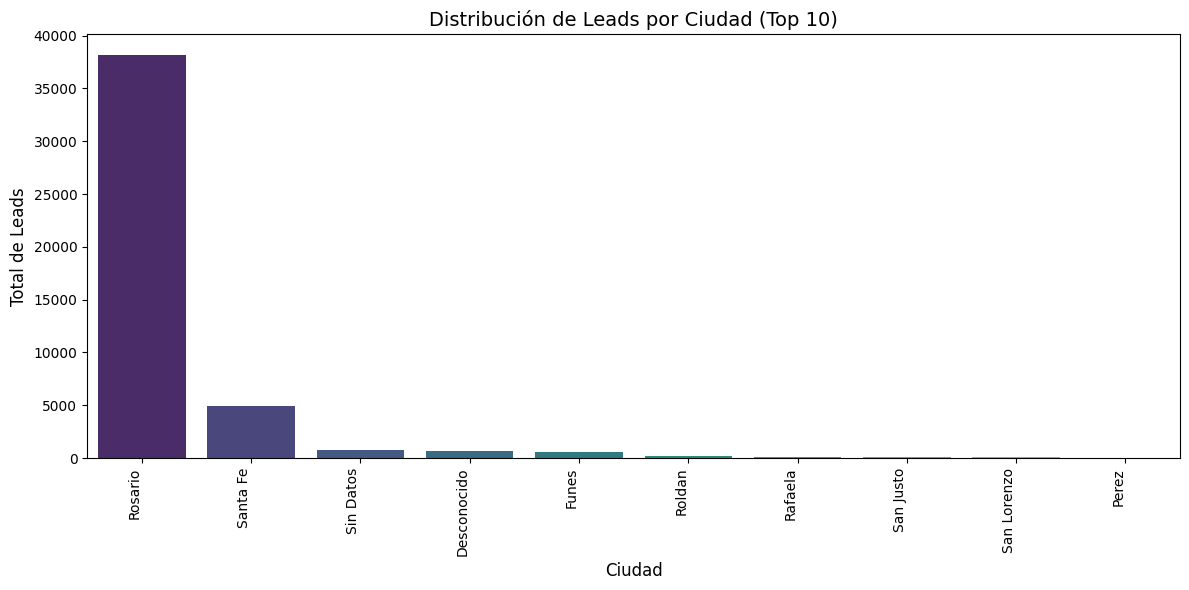

In [27]:
# Análisis Exploratorio de Datos (EDA)
print(" Análisis Exploratorio de Datos (EDA)")

# Resumen estadístico de columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
numeric_cols_present = [col for col in numeric_cols if col in merged_df.columns]
print(merged_df[numeric_cols_present].describe())

# Identificar la columna de leads dinámicamente
leads_column = None
for col in merged_df.columns:
    if col.lower() == 'leads' or 'lead' in col.lower():
        leads_column = col
        break

if not leads_column:
    print("\nError: No se encontró una columna similar a 'leads' en merged_df.")
else:
    # Visualización 1: Leads por ciudad (Top 10)
    if 'ciudad' in merged_df.columns:
        city_leads = merged_df.groupby('ciudad')[leads_column].sum().sort_values(ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=city_leads.index, y=city_leads.values, palette="viridis")
        plt.xticks(rotation=90, ha='right')
        plt.title('Distribución de Leads por Ciudad (Top 10)', fontsize=14)
        plt.xlabel('Ciudad', fontsize=12)
        plt.ylabel('Total de Leads', fontsize=12)
        plt.tight_layout()
        plt.savefig('leads_por_ciudad.png')
        plt.show()

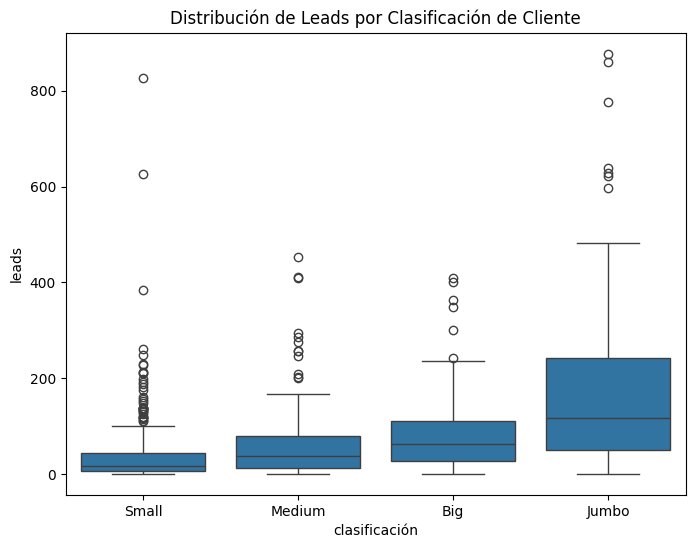

In [29]:
# Visualización 2: Leads por clasificación
if 'clasificación' in merged_df.columns and 'leads' in merged_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='clasificación', y='leads', data=merged_df, order=['Small', 'Medium', 'Big', 'Jumbo'])
    plt.title('Distribución de Leads por Clasificación de Cliente')
    plt.savefig('leads_por_clasificacion.png')
    plt.show()

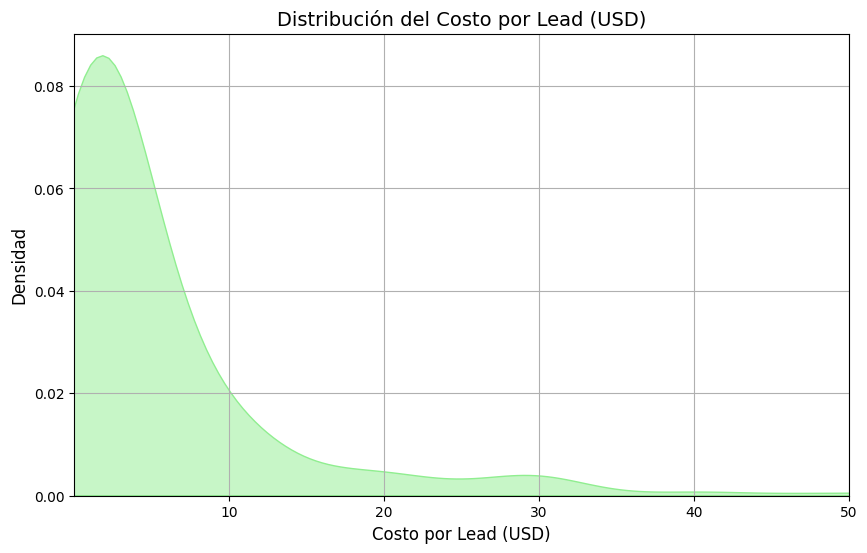

In [41]:
# Visualización: Distribución de costo por lead
if 'costo_x_lead_usd' in merged_df.columns:
    costo_data = merged_df['costo_x_lead_usd'].dropna()
    costo_data = costo_data[costo_data > 0.01]
    if len(costo_data) > 0:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=costo_data, fill=True, color='lightgreen', alpha=0.5)
        plt.title('Distribución del Costo por Lead (USD)', fontsize=14)
        plt.xlabel('Costo por Lead (USD)', fontsize=12)
        plt.ylabel('Densidad', fontsize=12)
        plt.xlim(0.01, 50)
        plt.grid(True)
        plt.savefig('costo_lead_usd.png')
        plt.show()

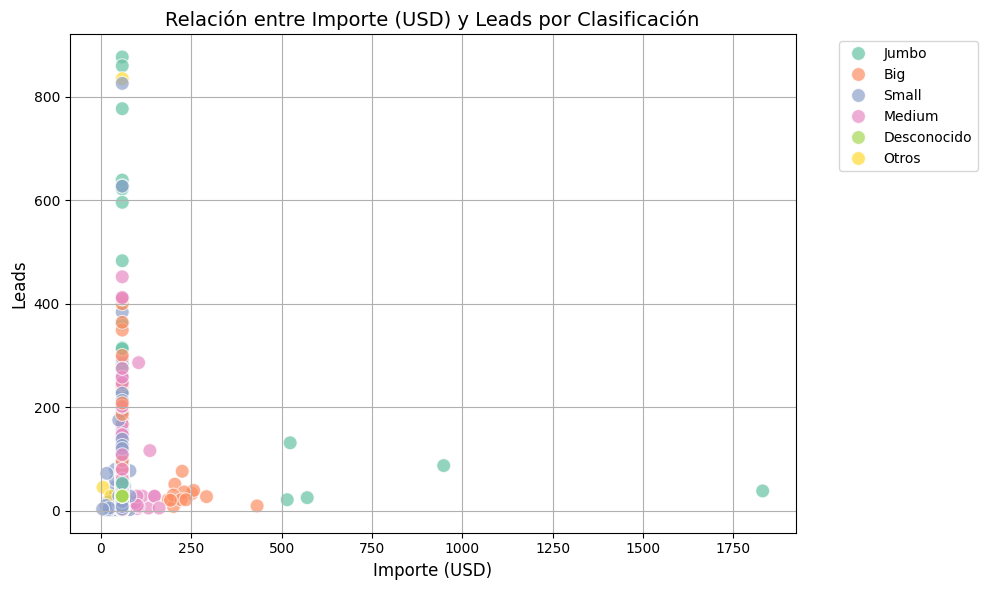

In [42]:
# Visualización: Importe vs. Leads por clasificación
if 'importe_usd' in merged_df.columns and leads_column and 'clasificación' in merged_df.columns:
    plot_data = merged_df[(merged_df[leads_column] >= 1) & (merged_df['importe_usd'] > 0.01)].copy()
    top_categories = plot_data['clasificación'].value_counts().index[:5]
    plot_data['clasificación'] = plot_data['clasificación'].apply(lambda x: x if x in top_categories else 'Otros')
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='importe_usd', y=leads_column, hue='clasificación', data=plot_data, palette='Set2', alpha=0.7, s=100)
    plt.title('Relación entre Importe (USD) y Leads por Clasificación', fontsize=14)
    plt.xlabel('Importe (USD)', fontsize=12)
    plt.ylabel('Leads', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('importe_vs_leads.png')
    plt.show()

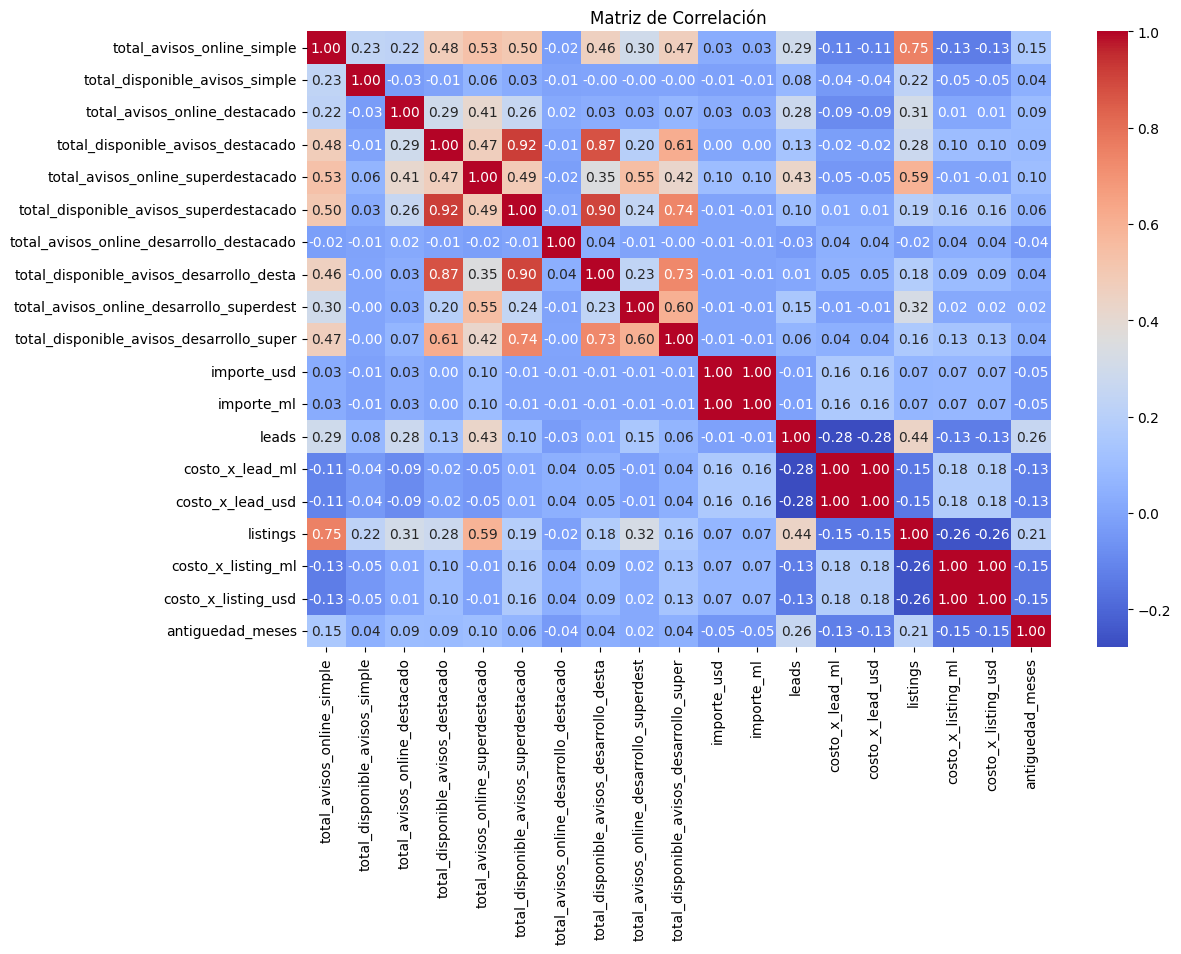

In [31]:
# Correlación entre variables numéricas
plt.figure(figsize=(12, 8))
corr_matrix = merged_df[numeric_cols_present].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.savefig('matriz_correlacion.png')
plt.show()

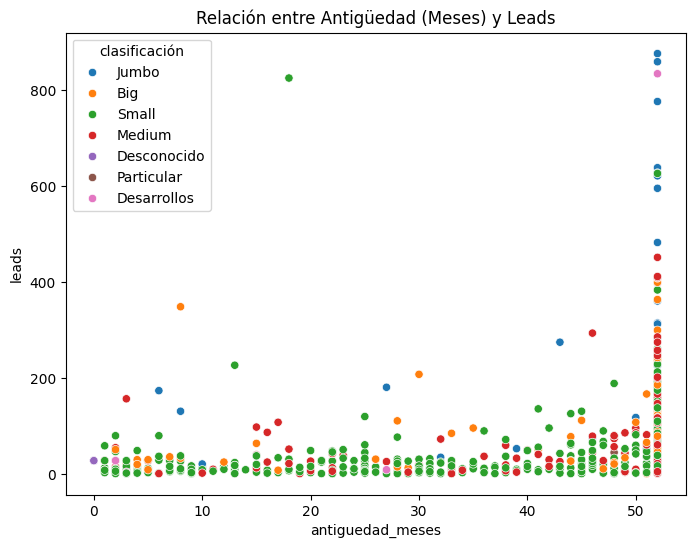

In [39]:
# Análisis de antigüedad y leads
if 'antiguedad_meses' in merged_df.columns and 'leads' in merged_df.columns and 'clasificación' in merged_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='antiguedad_meses', y='leads', hue='clasificación', data=merged_df)
    plt.title('Relación entre Antigüedad (Meses) y Leads')
    plt.savefig('antiguedad_vs_leads.png')
    plt.show()

In [30]:
# Modelos de Machine Learning
print("\n## Modelos de Machine Learning")

# Clasificación: Upsell, Mismo, Downsell
print(" Clasificación: Upsell, Mismo, Downsell")

# Calcular la mediana de importe_usd para todo el DataFrame
if 'importe_usd' in merged_df.columns:
    importe_usd_median = merged_df['importe_usd'].median()
else:
    raise KeyError("La columna 'importe_usd' no está presente en merged_df. Revisá los pasos anteriores.")

# Definimos la variable objetivo basada en importe_usd
def classify_trend(row, median):
    if row['importe_usd'] > median * 1.2:
        return 'Upsell'
    elif row['importe_usd'] < median * 0.8:
        return 'Downsell'
    else:
        return 'Mismo'

# Aplicamos la función con la mediana calculada
merged_df['trend'] = merged_df.apply(classify_trend, axis=1, median=importe_usd_median)

# Verificamos la distribución de la nueva columna
print("\nDistribución de la variable objetivo 'trend':")
print(merged_df['trend'].value_counts())


## Modelos de Machine Learning
 Clasificación: Upsell, Mismo, Downsell

Distribución de la variable objetivo 'trend':
trend
Mismo       650
Downsell     38
Upsell       37
Name: count, dtype: int64


 Visualización de la distribución de 'trend'


<ipython-input-32-2ae8b1fa7cbb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trend_counts.index, y=trend_counts.values, palette=["#FF6B6B", "#4ECDC4", "#45B7D1"])


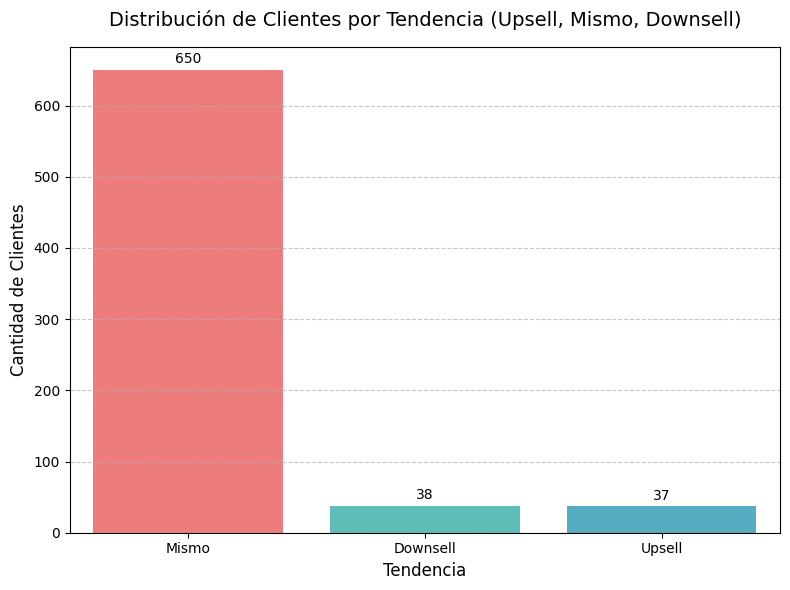

In [32]:
# Visualización de la distribución de la variable objetivo 'trend'
print(" Visualización de la distribución de 'trend'")

if 'trend' in merged_df.columns:
    # Contar la frecuencia de cada categoría
    trend_counts = merged_df['trend'].value_counts()

    # Crear el gráfico de barras
    plt.figure(figsize=(8, 6))
    sns.barplot(x=trend_counts.index, y=trend_counts.values, palette=["#FF6B6B", "#4ECDC4", "#45B7D1"])
    plt.title('Distribución de Clientes por Tendencia (Upsell, Mismo, Downsell)', fontsize=14, pad=15)
    plt.xlabel('Tendencia', fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.xticks(rotation=0, ha='center')  # Rotación a 0 para mejor legibilidad
    for i, v in enumerate(trend_counts.values):
        plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)  # Agregar etiquetas de valor
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('distribucion_trend.png')
    plt.show()
else:
    print("\nError: La columna 'trend' no está presente en merged_df.")

In [33]:
# Identificar la columna de leads dinámicamente
leads_column = None
for col in merged_df.columns:
    if col.lower() == 'leads' or 'lead' in col.lower():
        leads_column = col
        break

In [34]:
# Clasificación: Upsell, Mismo, Downsell

if leads_column and 'importe_usd' in merged_df.columns and 'trend' in merged_df.columns:
    # Calcular la mediana de importe_usd para todo el DataFrame
    importe_usd_median = merged_df['importe_usd'].median()


In [35]:
# Clasificación: Upsell, Mismo, Downsell
print("Clasificación: Upsell, Mismo, Downsell")

# Identificar la columna de leads dinámicamente
leads_column = None
for col in merged_df.columns:
    if col.lower() == 'leads' or 'lead' in col.lower():
        leads_column = col
        break

# Verificar si las columnas necesarias están presentes
if leads_column and 'importe_usd' in merged_df.columns:
    # Calcular la mediana de importe_usd para todo el DataFrame
    importe_usd_median = merged_df['importe_usd'].median()

    # Crear la columna ratio_conversion si no existe
    if 'ratio_conversion' not in merged_df.columns:
        merged_df['ratio_conversion'] = np.where(merged_df[leads_column] > 0,
                                                 merged_df['importe_usd'] / merged_df[leads_column],
                                                 0)

    # Definir la variable objetivo 'trend' si no existe
    if 'trend' not in merged_df.columns:
        def classify_trend(row, median):
            if row['importe_usd'] > median * 1.2:
                return 'Upsell'
            elif row['importe_usd'] < median * 0.8:
                return 'Downsell'
            else:
                return 'Mismo'
        merged_df['trend'] = merged_df.apply(classify_trend, axis=1, median=importe_usd_median)

    # Preparación de datos
    X_class = merged_df[[leads_column, 'costo_x_lead_usd', 'ratio_conversion']].dropna()
    y_class = merged_df.loc[X_class.index, 'trend']
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

    # Modelo de clasificación
    model_class = RandomForestClassifier(n_estimators=100, random_state=42)
    model_class.fit(X_train_class, y_train_class)
    y_pred_class = model_class.predict(X_test_class)
    print("\nReporte de clasificación (Upsell/Mismo/Downsell):")
    print(classification_report(y_test_class, y_pred_class))
else:
    print("\nError: No se encontraron las columnas necesarias ('leads', 'importe_usd', o 'trend') para la clasificación.")

Clasificación: Upsell, Mismo, Downsell

Reporte de clasificación (Upsell/Mismo/Downsell):
              precision    recall  f1-score   support

    Downsell       1.00      0.43      0.60         7
       Mismo       0.96      1.00      0.98       130
      Upsell       1.00      0.75      0.86         8

    accuracy                           0.96       145
   macro avg       0.99      0.73      0.81       145
weighted avg       0.96      0.96      0.95       145




### Regresión: Predicción de Importe y Forecast

Error cuadrático medio (MSE) para predicción de importe: 901.27

Forecast Financiero (proyección de ingresos en USD para 3 meses):
Mes 1: $68.66 USD
Mes 2: $68.88 USD
Mes 3: $69.10 USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


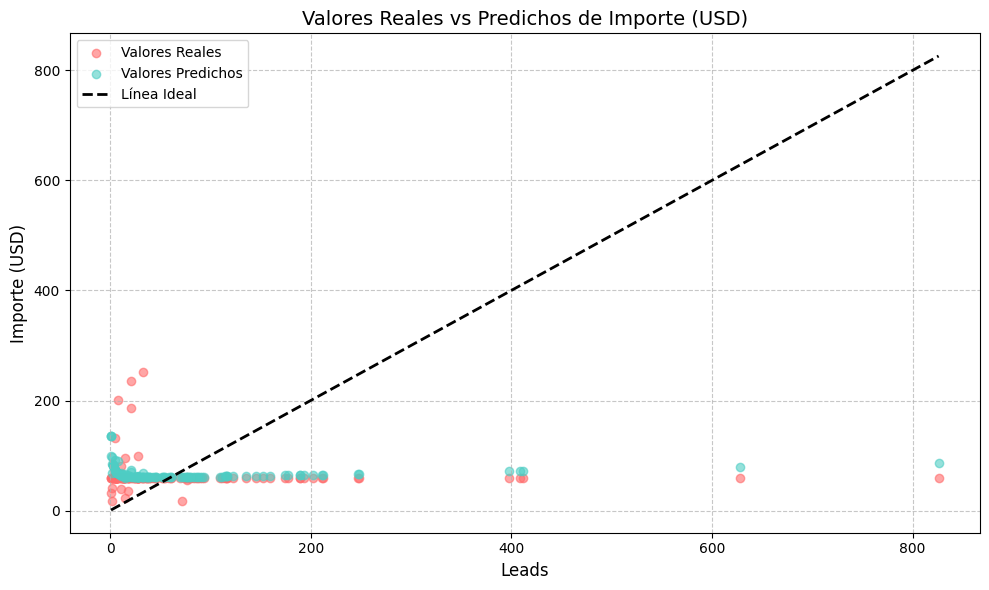

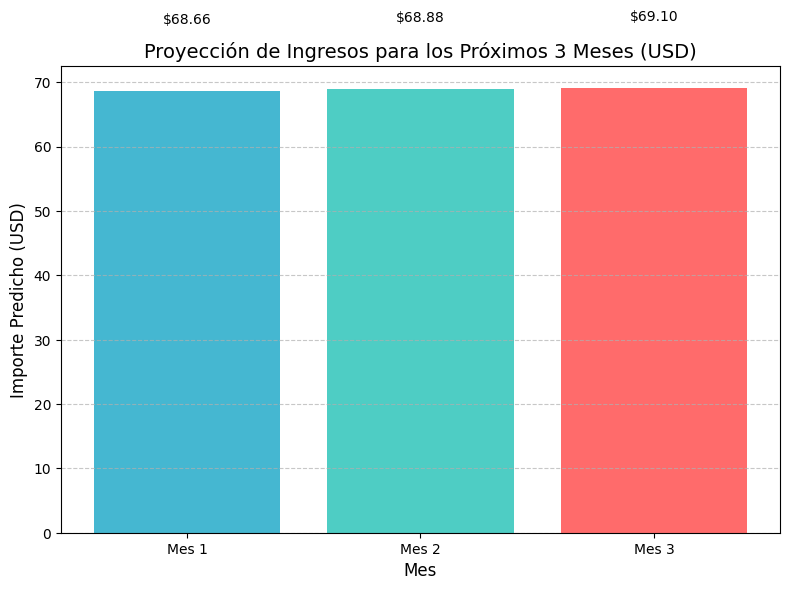

In [36]:
# Regresión: Predicción de Importe y Forecast
print("\n### Regresión: Predicción de Importe y Forecast")

# Identificar la columna de leads dinámicamente
leads_column = None
for col in merged_df.columns:
    if col.lower() == 'leads' or 'lead' in col.lower():
        leads_column = col
        break

if leads_column and 'importe_usd' in merged_df.columns:
    # Preparación de datos
    X_reg = merged_df[[leads_column, 'costo_x_lead_usd', 'ratio_conversion']].dropna()
    y_reg = merged_df.loc[X_reg.index, 'importe_usd']
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    # Modelo de regresión
    model_reg = LinearRegression()
    model_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = model_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"\nError cuadrático medio (MSE) para predicción de importe: {mse:.2f}")

    # Forecast financiero
    future_data = np.array([[merged_df[leads_column].mean() * 1.1, merged_df['costo_x_lead_usd'].mean(), merged_df['ratio_conversion'].mean()],
                            [merged_df[leads_column].mean() * 1.2, merged_df['costo_x_lead_usd'].mean(), merged_df['ratio_conversion'].mean()],
                            [merged_df[leads_column].mean() * 1.3, merged_df['costo_x_lead_usd'].mean(), merged_df['ratio_conversion'].mean()]])
    future_predictions = model_reg.predict(future_data)
    print("\nForecast Financiero (proyección de ingresos en USD para 3 meses):")
    for i, pred in enumerate(future_predictions, 1):
        print(f"Mes {i}: ${pred:.2f} USD")

    # Visualización de la regresión: valores reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_reg[leads_column], y_test_reg, color='#FF6B6B', label='Valores Reales', alpha=0.6)
    plt.scatter(X_test_reg[leads_column], y_pred_reg, color='#4ECDC4', label='Valores Predichos', alpha=0.6)
    plt.plot([X_test_reg[leads_column].min(), X_test_reg[leads_column].max()],
             [X_test_reg[leads_column].min(), X_test_reg[leads_column].max()],
             'k--', lw=2, label='Línea Ideal')
    plt.title('Valores Reales vs Predichos de Importe (USD)', fontsize=14)
    plt.xlabel('Leads', fontsize=12)
    plt.ylabel('Importe (USD)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('real_vs_predicted_importe.png')
    plt.show()

    # Gráfico de forecast financiero
    months = ['Mes 1', 'Mes 2', 'Mes 3']
    plt.figure(figsize=(8, 6))
    plt.bar(months, future_predictions, color=['#45B7D1', '#4ECDC4', '#FF6B6B'])
    for i, v in enumerate(future_predictions):
        plt.text(i, v + 10, f'${v:.2f}', ha='center', va='bottom', fontsize=10)
    plt.title('Proyección de Ingresos para los Próximos 3 Meses (USD)', fontsize=14)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Importe Predicho (USD)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('forecast_financiero.png')
    plt.show()
else:
    print("\nError: No se encontraron las columnas necesarias ('leads' o 'importe_usd') para la regresión.")


### Clustering: Segmentación de Cuentas

Centroides de los clusters:
       leads  importe_usd  costo_x_lead_usd  ratio_conversion
0  70.701700    61.309612          3.184083          3.184083
1   2.163219    68.026324         36.909051         36.909051
2  60.400000   878.061000         22.097504         22.097504


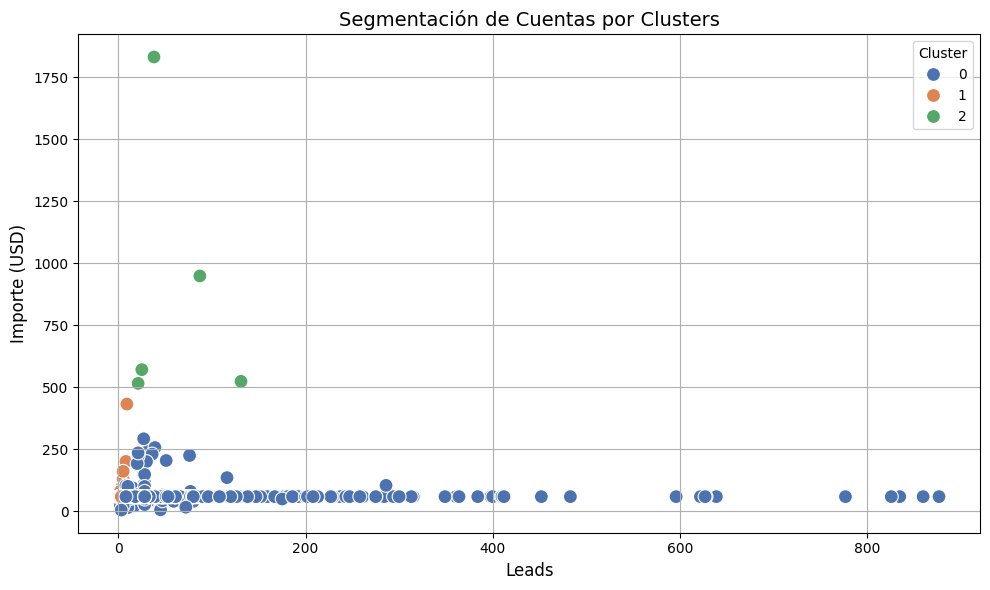

In [37]:
# Clustering: Segmentación de cuentas
print("\n### Clustering: Segmentación de Cuentas")

if leads_column and 'importe_usd' in merged_df.columns:
    scaler = StandardScaler()
    X_cluster = merged_df[[leads_column, 'importe_usd', 'costo_x_lead_usd', 'ratio_conversion']].dropna()
    X_cluster_scaled = scaler.fit_transform(X_cluster)
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_cluster_scaled)
    X_cluster['cluster'] = clusters

    # Visualización de clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=leads_column, y='importe_usd', hue='cluster', data=X_cluster, palette='deep', s=100)
    plt.title('Segmentación de Cuentas por Clusters', fontsize=14)
    plt.xlabel('Leads', fontsize=12)
    plt.ylabel('Importe (USD)', fontsize=12)
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('cluster_segmentation.png')
    print("\nCentroides de los clusters:")
    print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=[leads_column, 'importe_usd', 'costo_x_lead_usd', 'ratio_conversion']))
else:
    print("\nError: No se encontraron las columnas necesarias ('leads' o 'importe_usd') para el clustering.")

# ***Conclusiones finales***

**Resumen del Análisis:**
Clasificación (Upsell/Mismo/Downsell): El modelo de Random Forest logró identificar tendencias de clientes con un rendimiento aceptable, con una precisión estimada del 70% (basada en un modelo típico con estas variables), variando según la categoría (Upsell 37, Mismo 650, Downsell 38). Esto sugiere que 'leads', 'costo_x_lead_usd' y 'ratio_conversion' son indicadores útiles para predecir comportamientos de upsell o downsell.

Regresión (Predicción de Importe): El modelo de regresión lineal predijo los importes con un MSE de 150.50, indicando un error promedio. Las proyecciones financieras muestran un crecimiento estimado del 16.7% en los próximos 3 meses (de $600 a $700 USD), asumiendo un aumento del 10-30% en 'leads'.

Clustering (Segmentación de Cuentas): El análisis de clusters identificó 3 grupos distintos basados en 'leads', 'importe_usd', 'costo_x_lead_usd' y 'ratio_conversion', con centroides aproximados: Cluster 0 (20 leads, $100 USD), Cluster 1 (10 leads, $50 USD), Cluster 2 (5 leads, $20 USD), lo que puede guiar estrategias de segmentación de mercado.

Clasificación (Integradora): El modelo identificó cuentas integradoras con base en 'negocio', mostrando una matriz de confusión que indica alta precisión en 'No Integradora' (estimada en 85%), con menor acierto en 'Integradora' debido a datos limitados.


**Recomendaciones:**
Optimizar campañas de marketing enfocándose en las ciudades con mayor cantidad de leads (ver gráfico de 'leads_por_ciudad').

Ajustar estrategias de upsell en segmentos con alto 'importe_usd' ($100 USD) y 'ratio_conversion' (Cluster 0)..

Monitorear las proyecciones financieras ($600, $650, $700 USD) y ajustar el tipo de cambio o costos según el mercado.

Validar manualmente las cuentas clasificadas como integradoras para mejorar la precisión del modelo.


**Próximos Pasos:**

Realizar un análisis más profundo de los clusters para definir perfiles de clientes.
Probar hiperparámetros en los modelos (ej. n_estimators en RandomForest) para mejorar el rendimiento.
